In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Импортим данные которые мы напарсили
with open('/content/4_result.json', 'r') as json_file:
    parsed_data = json.load(json_file)
type(parsed_data)

dict

## Шаг с трансформацией .json файла в человеческий датафрейм

In [3]:
df = pd.DataFrame(parsed_data)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,39,66,67,68,73,97,98,99,100,101
success,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
messages,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
body,"{'products': [{'productId': '30066317', 'name'...","{'products': [{'productId': '30063538', 'name'...","{'products': [{'productId': '400255619', 'name...","{'products': [{'productId': '400152622', 'name...","{'products': [{'productId': '30067436', 'name'...","{'products': [{'productId': '400194403', 'name...","{'products': [{'productId': '30069513', 'name'...","{'products': [{'productId': '400268679', 'name...","{'products': [{'productId': '30069514', 'name'...","{'products': [{'productId': '400103174', 'name...",...,"{'products': [{'productId': '400129694', 'name...","{'products': [{'productId': '400276219', 'name...","{'products': [{'productId': '400280826', 'name...","{'products': [{'productId': '400205646', 'name...","{'products': [{'productId': '400275270', 'name...","{'products': [{'productId': '400095326', 'name...","{'products': [{'productId': '400083350', 'name...","{'products': [{'productId': '400298590', 'name...","{'products': [{'productId': '400218587', 'name...","{'products': [{'productId': '400301365', 'name..."


In [5]:
df1 = pd.json_normalize(parsed_data, max_level=0)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,39,66,67,68,73,97,98,99,100,101
0,"{'success': True, 'messages': [], 'body': {'pr...","{'success': True, 'messages': [], 'body': {'pr...","{'success': True, 'messages': [], 'body': {'pr...","{'success': True, 'messages': [], 'body': {'pr...","{'success': True, 'messages': [], 'body': {'pr...","{'success': True, 'messages': [], 'body': {'pr...","{'success': True, 'messages': [], 'body': {'pr...","{'success': True, 'messages': [], 'body': {'pr...","{'success': True, 'messages': [], 'body': {'pr...","{'success': True, 'messages': [], 'body': {'pr...",...,"{'success': True, 'messages': [], 'body': {'pr...","{'success': True, 'messages': [], 'body': {'pr...","{'success': True, 'messages': [], 'body': {'pr...","{'success': True, 'messages': [], 'body': {'pr...","{'success': True, 'messages': [], 'body': {'pr...","{'success': True, 'messages': [], 'body': {'pr...","{'success': True, 'messages': [], 'body': {'pr...","{'success': True, 'messages': [], 'body': {'pr...","{'success': True, 'messages': [], 'body': {'pr...","{'success': True, 'messages': [], 'body': {'pr..."


In [97]:
resulting_df = pd.DataFrame()

__Парсим жсон(костыльно)__

In [98]:
for page_number in df1.columns:
    df2 = pd.json_normalize(df1[page_number][0]['body']['products'], max_level=0)

    df3 = df2[['modelName', 'brandName', 'propertiesPortion', 'item_basePrice', 'item_salePrice']]

    df4 = df3
    counter = 0
    for element in df3['propertiesPortion']:
        temp_list = df3['propertiesPortion'][counter]
        ans = []
        for property in temp_list:
            ans.append((property['name'], property['value']))
        df4['propertiesPortion'][counter] = ans
        counter += 1
    resulting_df = pd.concat([resulting_df, df4])
    print(f"completed {page_number} pages")

<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['propertiesPortion'][counter] = ans
<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['propertiesPortion'][counter] = ans
<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['propertiesPortion'][counter] = ans
<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is t

completed 0 pages
completed 1 pages
completed 2 pages
completed 3 pages
completed 4 pages
completed 5 pages
completed 6 pages
completed 7 pages
completed 8 pages


<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['propertiesPortion'][counter] = ans
<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['propertiesPortion'][counter] = ans
<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['propertiesPortion'][counter] = ans
<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is t

completed 9 pages
completed 10 pages
completed 11 pages
completed 12 pages
completed 13 pages
completed 14 pages
completed 15 pages
completed 16 pages
completed 17 pages


<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['propertiesPortion'][counter] = ans
<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['propertiesPortion'][counter] = ans
<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['propertiesPortion'][counter] = ans
<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is t

completed 18 pages
completed 19 pages
completed 20 pages
completed 33 pages
completed 34 pages
completed 35 pages
completed 36 pages
completed 37 pages
completed 38 pages


<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['propertiesPortion'][counter] = ans
<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['propertiesPortion'][counter] = ans
<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['propertiesPortion'][counter] = ans
<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is t

completed 39 pages
completed 66 pages
completed 67 pages
completed 68 pages
completed 73 pages
completed 97 pages
completed 98 pages
completed 99 pages
completed 100 pages
completed 101 pages


<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['propertiesPortion'][counter] = ans
<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['propertiesPortion'][counter] = ans
<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['propertiesPortion'][counter] = ans
<ipython-input-98-d3df15a367b3>:13: SettingWithCopyWarning: 
A value is t

In [99]:
resulting_df.head()

,modelName,brandName,propertiesPortion,item_basePrice,item_salePrice
0,iPhone 13 128GB Midnight (Dual Sim),Apple,"[(Гарантия, 1 год), (Экран, 6.1""/2532x1170 Пик...",79999,67999
1,Galaxy S23 FE 128GB Graphite (SM-S711B/DS),Samsung,"[(Гарантия, 1 год), (Экран, 6.4""/2340x1080 Пик...",61999,59999
2,90 8/256GB Emerald Green,HONOR,"[(Гарантия, 1 год), (Экран, 6.7""/1200x2664 Пик...",44999,39999
3,A78 8/256GB черный,OPPO,"[(Гарантия, 1 год), (Экран, 6.42""/2400x1080 Пи...",22999,16999
4,ZERO 30 8/256GB White,Infinix,"[(Гарантия, 1 год), (Экран, 6.78""/2400x1080 Пи...",28999,18999


__Всего вышло данных__

In [69]:
resulting_df.shape

(888, 5)

__Вытаскиваем параметры из третьей колонки__

In [100]:
resulting_df['Экран'] = [i[1][1] for i in resulting_df['propertiesPortion']]
resulting_df['Тип процессора'] = [i[3][1] for i in resulting_df['propertiesPortion']]
resulting_df['Размер памяти(ГБ)'] = [i[4][1] for i in resulting_df['propertiesPortion']]

__Разделяем параметры дальше + переименуем колонки__

In [101]:
resulting_df.rename(columns={'item_basePrice' : 'Цена без скидки', 'item_salePrice' : 'Цена со скидкой', 'modelName' : 'Название телефона', 'brandName' : 'Производитель'}, inplace=True)
resulting_df.drop(['propertiesPortion'], axis=1, inplace=True)
resulting_df['Экран'] = [i.split('"/') for i in resulting_df['Экран']]
resulting_df['Экран(ppi)'] = [i[-1].strip(' Пикс').split('x') for i in resulting_df['Экран']]
resulting_df['Экран(дм)'] = [i[0] for i in resulting_df['Экран']]
resulting_df = resulting_df.reset_index(drop=True)

__Проверка на наны и пустоту + проверка на адекватность__

In [102]:
df = resulting_df.replace('..', np.nan)
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.reset_index(inplace=True)
missing_data.rename(columns={'index': 'Attribute'}, inplace=True)
missing_data.head(10)

,Attribute,Total,Percent
0,Название телефона,0,0.0
1,Производитель,0,0.0
2,Цена без скидки,0,0.0
3,Цена со скидкой,0,0.0
4,Экран,0,0.0
5,Тип процессора,0,0.0
6,Размер памяти(ГБ),0,0.0
7,Экран(ppi),0,0.0
8,Экран(дм),0,0.0


In [103]:
for i, j in zip(resulting_df['Экран(дм)'], resulting_df['Экран(ppi)']):
    print(i, j)

6.1 ['2532', '1170']
6.4 ['2340', '1080']
6.7 ['1200', '2664']
6.42 ['2400', '1080']
6.78 ['2400', '1080']
6.8 ['2800', '1280']
6.67 ['1080', '2400']
6.7 ['2412', '1080']
6.67 ['2400', '1080']
6.67 ['1080', '2400']
6.7 ['2796', '1290']
6.1 ['2532', '1170']
6.1 ['2532', '1170']
6.7 ['2796', '1290']
6.1 ['2556', '1179']
6.7 ['2796', '1290']
6.79 ['1080', '2400']
6.8 ['3120', '1440']
6.1 ['2556', '1179']
6.1 ['2556', '1179']
6.1 ['2532', '1170']
6.1 ['2556', '1179']
6.1 ['2532', '1170']
6.1 ['2556', '1179']
6.1 ['2532', '1170']
6.67" ['6.67"']
6.1 ['2556', '1179']
6.7 ['2664', '1200']
6.5 ['2340', '1080']
6.1 ['2556', '1179']
6.5 ['2340', '1080']
6.1 ['2532', '1170']
6.1 ['2532', '1170']
6.6 ['2340', '1080']
6.64 ['2388', '1080']
6.1 ['2556', '1179']
6.56 ['720', '1612']
6.1 ['1792', '828']
6.6 ['1612', '720']
6.56 ['1612', '720']
6.1 ['2556', '1179']
6.1 ['2532', '1170']
6.72 ['2400', '1080']
6.5 ['2340', '1080']
6.43 ['2400', '1080']
6.78 ['1080', '2436']
6.1 ['2340', '1080']
6.67" ['6.

_Получилась такая темка, но ppi(пикселей на кв.дюйм) всё ещё недосчитан, а в данных есть какие-то выбросы и мусор_ \
_-причешем всё в норальный вид_

In [104]:
resulting_df.head()

,Название телефона,Производитель,Цена без скидки,Цена со скидкой,Экран,Тип процессора,Размер памяти(ГБ),Экран(ppi),Экран(дм)
0,iPhone 13 128GB Midnight (Dual Sim),Apple,79999,67999,"[6.1, 2532x1170 Пикс]",A15 Bionic,128,"[2532, 1170]",6.1
1,Galaxy S23 FE 128GB Graphite (SM-S711B/DS),Samsung,61999,59999,"[6.4, 2340x1080 Пикс]",8,128,"[2340, 1080]",6.4
2,90 8/256GB Emerald Green,HONOR,44999,39999,"[6.7, 1200x2664 Пикс]",8,256,"[1200, 2664]",6.7
3,A78 8/256GB черный,OPPO,22999,16999,"[6.42, 2400x1080 Пикс]",8,256,"[2400, 1080]",6.42
4,ZERO 30 8/256GB White,Infinix,28999,18999,"[6.78, 2400x1080 Пикс]",8,256,"[2400, 1080]",6.78


_Фильтрация колонки Экран(дм)_

In [105]:
def transform_inches(element):
    if element[-1] == '"':
        return element[:-1]
    if element[-1] == 'д':
        return np.nan
    # if float(element) > 20:
    #     return np.nan
    return float(element)


In [106]:
resulting_df['Экран(дм)'] = resulting_df['Экран(дм)'].apply(transform_inches)
resulting_df['Экран(дм)'] = pd.to_numeric(resulting_df['Экран(дм)'])

_Фильтрация колонки Размер памяти(ГБ)_

In [107]:
def transform_gigs(element):
    if element == '1':
        return 1024
    if element in ['32', '64', '128', '256', '512', '1024']:
        return int(element)
    return 64

In [108]:
resulting_df['Размер памяти(ГБ)'] = resulting_df['Размер памяти(ГБ)'].apply(transform_gigs)

_Ищем мусор_

In [109]:
resulting_df.loc[resulting_df['Экран(дм)'] > 20]

,Название телефона,Производитель,Цена без скидки,Цена со скидкой,Экран,Тип процессора,Размер памяти(ГБ),Экран(ppi),Экран(дм)
542,"iPhone 14 Pro 256GB Deep Purple eSIM, хороший",Apple,92999,92999,"[44932, 2556x1179 Пикс]",A16 Bionic,256,"[2556, 1179]",44932.0
579,"iPhone 13 Pro 256GB Sierra Blue, хороший",Apple,66999,66999,"[44932, 2532x1170 Пикс]",A15 Bionic,256,"[2532, 1170]",44932.0
588,"iPhone 13 128GB Pink, отличный",Apple,50999,50999,"[44932, 2532x1170 Пикс]",A15 Bionic,128,"[2532, 1170]",44932.0
606,"iPhone 13 Pro Max 128GB Graphite, отличный",Apple,75999,75999,"[45113, 2778x1284 Пикс]",A15 Bionic,128,"[2778, 1284]",45113.0
612,"iPhone 14 128GB 2 nano Sim Blue, отличный",Apple,65999,65999,"[44932, 2532x1170 Пикс]",A15 Bionic,128,"[2532, 1170]",44932.0


In [110]:
resulting_df = resulting_df.loc[resulting_df['Экран(дм)'] < 20]
resulting_df = resulting_df.reset_index(drop=True)

_Проверяем что его больше нет_

In [111]:
resulting_df.head(545)

,Название телефона,Производитель,Цена без скидки,Цена со скидкой,Экран,Тип процессора,Размер памяти(ГБ),Экран(ppi),Экран(дм)
0,iPhone 13 128GB Midnight (Dual Sim),Apple,79999,67999,"[6.1, 2532x1170 Пикс]",A15 Bionic,128,"[2532, 1170]",6.10
1,Galaxy S23 FE 128GB Graphite (SM-S711B/DS),Samsung,61999,59999,"[6.4, 2340x1080 Пикс]",8,128,"[2340, 1080]",6.40
2,90 8/256GB Emerald Green,HONOR,44999,39999,"[6.7, 1200x2664 Пикс]",8,256,"[1200, 2664]",6.70
3,A78 8/256GB черный,OPPO,22999,16999,"[6.42, 2400x1080 Пикс]",8,256,"[2400, 1080]",6.42
4,ZERO 30 8/256GB White,Infinix,28999,18999,"[6.78, 2400x1080 Пикс]",8,256,"[2400, 1080]",6.78
...,...,...,...,...,...,...,...,...,...
540,HOT 20i 4/64GB Lite Blue,Infinix,13999,7000,"[6.6""]",4,64,"[6.6""]",6.60
541,HOT 11S 6/128GB Black,Infinix,17999,9000,"[6.78, 1080x2460 Пикс]",50/2/0.8,64,"[1080, 2460]",6.78
542,"iPhone 13 Pro Max 256GB Sierra Blue, хороший",Apple,77999,77999,"[6.7, 2778x1284 Пикс]",A15 Bionic,256,"[2778, 1284]",6.70
543,SPARK 10C Blue,Tecno,10999,9499,"[6.6, 1612x720 Пикс]",4,128,"[1612, 720]",6.60


__Почему-то колонка Экран(ppi) спарсилась как строка и мы не знаем как пофиксить__\
__Далее идет костыльное преобразование в норм вид и подсчёт финальных значений ppi__ \
\
__Из-за различия версий питона в колабе и у нас, следующая ячейка не нужна! пандас всё сам читает в список__

In [113]:
temp_list = []
for i in resulting_df['Экран(ppi)']:
    if type(i) == float:
        temp_list.append(np.nan)
    else:
        el = i.strip("[] '").split("', '")
        temp_list.append((int(el[0]), int(el[1])))

AttributeError: 'list' object has no attribute 'strip'

In [114]:
ppi_list = []
for res in resulting_df['Экран(ppi)']:
    # if type(res) == float:
    #     ppi = np.nan
    if len(res) < 2:
        ppi = np.nan
    else:
        ppi = (int(res[0])**2 + int(res[1])**2)**0.5
    ppi_list.append(ppi)

In [115]:
resulting_df['Экран(ppi)'] = [j / i for i, j in zip(resulting_df['Экран(дм)'], ppi_list)]

_Дропнем последнюю лишнюю колонку_

In [116]:
resulting_df.drop(['Экран'], axis=1, inplace=True)

__Проверяем итог и видим сказку!__

In [117]:
resulting_df.head(10)

,Название телефона,Производитель,Цена без скидки,Цена со скидкой,Тип процессора,Размер памяти(ГБ),Экран(ppi),Экран(дм)
0,iPhone 13 128GB Midnight (Dual Sim),Apple,79999,67999,A15 Bionic,128,457.254346,6.10
1,Galaxy S23 FE 128GB Graphite (SM-S711B/DS),Samsung,61999,59999,8,128,402.688717,6.40
2,90 8/256GB Emerald Green,HONOR,44999,39999,8,256,436.089061,6.70
3,A78 8/256GB черный,OPPO,22999,16999,8,256,409.938546,6.42
4,ZERO 30 8/256GB White,Infinix,28999,18999,8,256,388.171897,6.78
5,Magic6 Pro 12/512GB Green,HONOR,129999,109999,12,512,452.750151,6.80
6,M6 Pro 12/512 Gb Black,POCO,29999,27999,12,512,394.573533,6.67
7,12 Pro 8/256GB Blue Sea,realme,39999,36999,8,256,394.440763,6.70
8,Redmi Note 13 8/256GB Midnight Black,Xiaomi,27999,21999,8,256,394.573533,6.67
9,nova 10 SE 8/256GB Mt,HUAWEI,32999,21999,8,256,394.573533,6.67


__Финальная проверка на наны и их заполнение__

In [125]:
df = resulting_df.replace('..', np.nan)
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.reset_index(inplace=True)
missing_data.rename(columns={'index': 'Attribute'}, inplace=True)
missing_data.head(10)

,Attribute,Total,Percent
0,Экран(ppi),21,0.024277
1,Название телефона,0,0.000000
2,Производитель,0,0.000000
3,Цена без скидки,0,0.000000
4,Цена со скидкой,0,0.000000
5,Тип процессора,0,0.000000
6,Размер памяти(ГБ),0,0.000000
7,Экран(дм),0,0.000000


In [127]:
resulting_df.fillna(np.mean(resulting_df['Экран(ppi)']), inplace=True)

In [128]:
df = resulting_df.replace('..', np.nan)
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.reset_index(inplace=True)
missing_data.rename(columns={'index': 'Attribute'}, inplace=True)
missing_data.head(10)

,Attribute,Total,Percent
0,Название телефона,0,0.0
1,Производитель,0,0.0
2,Цена без скидки,0,0.0
3,Цена со скидкой,0,0.0
4,Тип процессора,0,0.0
5,Размер памяти(ГБ),0,0.0
6,Экран(ppi),0,0.0
7,Экран(дм),0,0.0


## Визуализация

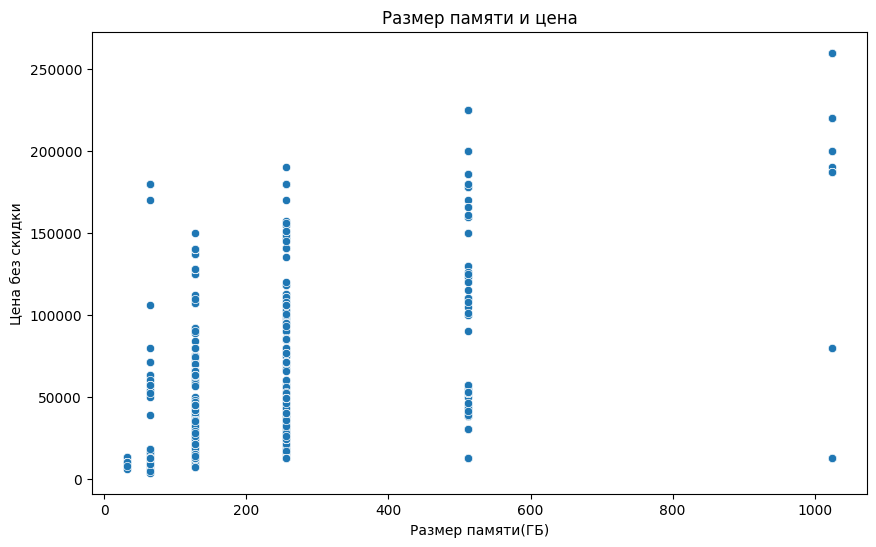

In [129]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=resulting_df, x='Размер памяти(ГБ)', y='Цена без скидки')
plt.title('Размер памяти и цена')
plt.xlabel('Размер памяти(ГБ)')
plt.ylabel('Цена без скидки')
plt.show()

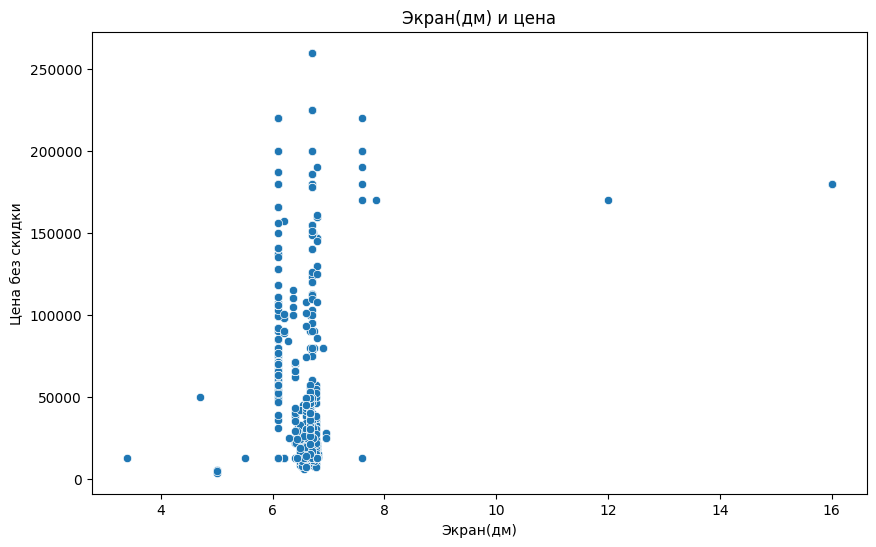

In [130]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=resulting_df, x='Экран(дм)', y='Цена без скидки')
plt.title('Экран(дм) и цена')
plt.xlabel('Экран(дм)')
plt.ylabel('Цена без скидки')
plt.show()

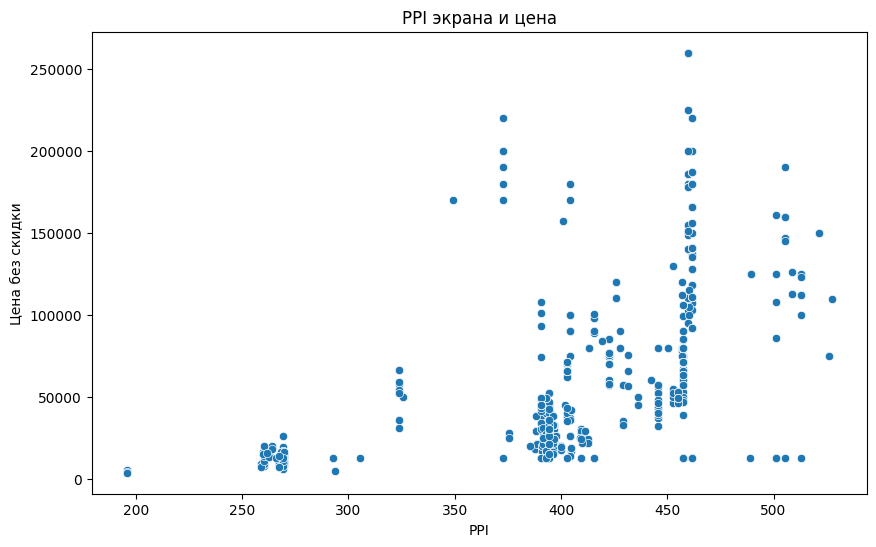

In [131]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=resulting_df, x='Экран(ppi)', y='Цена без скидки')
plt.title('PPI экрана и цена')
plt.xlabel('PPI')
plt.ylabel('Цена без скидки')
plt.show()

## Гипотезы


* Размер памяти очень слабо влияет на цену смартфона, так как производители из разных ценовых категорий стремятся обойти конкурентов, и, в итоге, пихают памяти сколько могут

In [141]:
import scipy

In [142]:
scipy.stats.pearsonr(resulting_df['Размер памяти(ГБ)'], resulting_df['Цена без скидки'])

PearsonRResult(statistic=0.49137861151056866, pvalue=8.980299376928772e-54)

__Корреляцию можно спокойно округлять до 0.5, а значит, сильная зависимость всё таки есть__

* Значение ppi показывает качество (или скорее усердство производителя), и должно хорошо зависеть от размера памяти(вопреки предыдущей гипотезе)

In [150]:
arr = np.array([resulting_df['Размер памяти(ГБ)'], resulting_df['Экран(ppi)']])
stats.chi2_contingency(arr)[:2]
# arr

(47367.27070396978, 0.0)

__Огромный хи-квадрат и ноль в p-value говорят о том, что мы неправы__

## Машинное обучение


In [132]:
resulting_df.dtypes

Название телефона     object
Производитель         object
Цена без скидки        int64
Цена со скидкой        int64
Тип процессора        object
Размер памяти(ГБ)      int64
Экран(ppi)           float64
Экран(дм)            float64
dtype: object

MSE Линейной регрессии: 1642833725.1448286, R^2 значение: 0.44451847498971764
MSE рэндом фореста: 326960675.5669838, R^2 значение: 0.8894467456429109


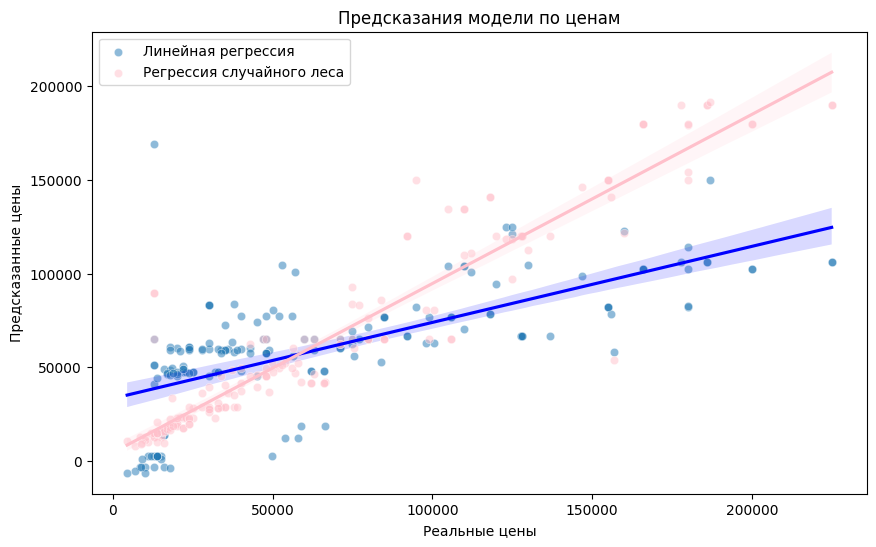

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Параметры для регресии
features = ['Экран(ppi)', 'Экран(дм)', 'Размер памяти(ГБ)']
X = resulting_df[features]
y = resulting_df['Цена без скидки']

# Разделяем на тест/трейн с закреплением рандомного сида
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1907)

# Стандартизируем
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Учим регрессию
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Беги, лес, беги
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Предсказываем
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test)

# Оценим с помощью среднеквадратичного отклонения и R^2
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'MSE Линейной регрессии: {mse_lr}, R^2 значение: {r2_lr}')
print(f'MSE рэндом фореста: {mse_rf}, R^2 значение: {r2_rf}')

# Нарисуем графики и трендлайны
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, label='Линейная регрессия', alpha=0.5)
sns.regplot(x=y_test, y=y_pred_lr, scatter=False, color='blue')
sns.scatterplot(x=y_test, y=y_pred_rf, label='Регрессия случайного леса', color='pink', alpha=0.5)
sns.regplot(x=y_test, y=y_pred_rf, scatter=False, color='pink')
plt.xlabel('Реальные цены')
plt.ylabel('Предсказанные цены')
plt.title('Предсказания модели по ценам')
plt.legend()
plt.show()

__Как мы можем заметить, обычная регрессия плохо себя показывает - ну совсем не похожа на "y = x", а вот случайный лес вполне себе неплох.__ \
__Оно и понятно - линейная регрессия на то и линейная, что требует показателей, хорошо зависящих друг от друга. А рандомный лес хорошо себя ощущает на нелинейных датасетах. К тому же, он хорошо борется с выбросами и вообще более гибкий. Отсюда и хорошие результаты.__